# Data Cleaning and Analysis

In [1]:
import pandas as pd

df = pd.read_excel('/Users/kashvikumar/Downloads/Castlery dataframe.xlsx')

In [3]:
print(df)

      Month Category  Clicks  Impressions
0  Jan 2024    Sofas  556983       786065
1  Jan 2024     Beds  188656       651311
2  Jan 2024  Outdoor  152721       808524
3  Feb 2024    Sofas  501285       707459
4  Feb 2024     Beds  169790       586180
5  Feb 2024  Outdoor  137449       727672
6  Mar 2024    Sofas  421079       611244
7  Mar 2024     Beds  142624       594265
8  Mar 2024  Outdoor  115457       492391


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        9 non-null      object
 1   Category     9 non-null      object
 2   Clicks       9 non-null      int64 
 3   Impressions  9 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 420.0+ bytes


#### The Month field has the wrong datatype. The correct one should be datetime and not object.
#### This can be fixed as follows:

In [7]:
df['Month'] = pd.to_datetime(df['Month'], format='%b %Y')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        9 non-null      datetime64[ns]
 1   Category     9 non-null      object        
 2   Clicks       9 non-null      int64         
 3   Impressions  9 non-null      int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 420.0+ bytes


#### Taking a look at the dataframe again:

In [9]:
print(df)

       Month Category  Clicks  Impressions
0 2024-01-01    Sofas  556983       786065
1 2024-01-01     Beds  188656       651311
2 2024-01-01  Outdoor  152721       808524
3 2024-02-01    Sofas  501285       707459
4 2024-02-01     Beds  169790       586180
5 2024-02-01  Outdoor  137449       727672
6 2024-03-01    Sofas  421079       611244
7 2024-03-01     Beds  142624       594265
8 2024-03-01  Outdoor  115457       492391


#### Since the datarame is now in the correct format, the visualisations/charts to help stakeholders understand the overall performance better are as follows:

# Count-Month Graph

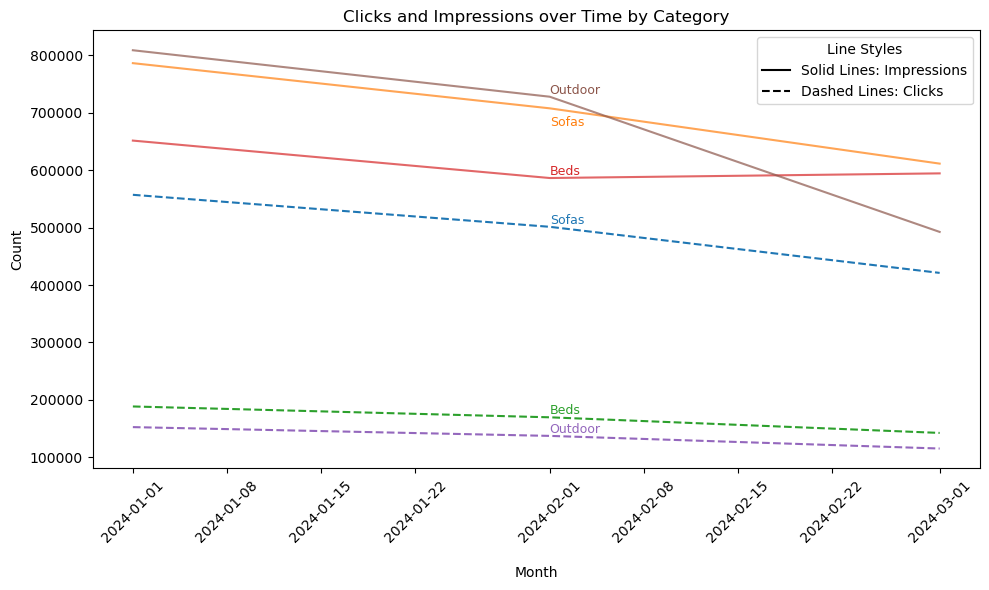

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Clicks and Impressions over Time
plt.figure(figsize=(10, 6))
for category in df['Category'].unique():
    category_data = df[df['Category'] == category]
    
    # Plot Clicks with dashed lines
    clicks_line, = plt.plot(category_data['Month'], category_data['Clicks'], linestyle='--')
    # Plot Impressions with solid lines
    impressions_line, = plt.plot(category_data['Month'], category_data['Impressions'], alpha=0.7)
    
    # Add annotations for each type of furniture
    # Clicks annotations
    mid_index_clicks = len(category_data) // 2
    mid_month_clicks = category_data['Month'].iloc[mid_index_clicks]
    mid_value_clicks = category_data['Clicks'].iloc[mid_index_clicks]
    plt.text(mid_month_clicks, mid_value_clicks, category, fontsize=9, color=clicks_line.get_color(), verticalalignment='bottom')

    # Impressions annotations
    mid_index_impressions = len(category_data) // 2
    mid_month_impressions = category_data['Month'].iloc[mid_index_impressions]
    mid_value_impressions = category_data['Impressions'].iloc[mid_index_impressions]
    
    # Adjust annotation for Sofas impressions to be below the line
    if category == 'Sofas':
        plt.text(mid_month_impressions, mid_value_impressions - 0.02 * mid_value_impressions,  # Shift slightly further below
                 category, fontsize=9, color=impressions_line.get_color(), verticalalignment='top')
    else:
        plt.text(mid_month_impressions, mid_value_impressions, category, fontsize=9, color=impressions_line.get_color(), verticalalignment='bottom')

# Add a legend for Impressions and Clicks lines
plt.plot([], [], 'k-', label='Solid Lines: Impressions')
plt.plot([], [], 'k--', label='Dashed Lines: Clicks')
plt.legend(title='Line Styles')

plt.title('Clicks and Impressions over Time by Category')
plt.xlabel('Month', labelpad=15)
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Insights from the Count-Month Graph

## 1. Click-to-Impression Ratio (CTR)
#### a)	Impressions are consistently higher than Clicks, for all the products. This prompts us to ask questions to identify potential barriers to user engagement, such as:
#### •	Is the website layout intuitive and user-friendly enough to prompt clicks?
#### •	Are the product images and descriptions compelling enough to peak user interest?
#### •	Are the Call-to-Actions enticing enough and optimised throughout the website layout to prompt clicks?
#### b)	The CTR is the highest for Sofas.
#### •	Stakeholders can consider offering variations in colour, material or size, to appeal to a broader audience and increase profits from sofas.
#### •	Stakeholders can also sell bundle deals by including items like sofa cushions, throws or coffee tables. Upselling these products to drive higher Average Order Value (AOV) will generate higher revenue. 

## 2. Seasonal trends
#### a)	Both Clicks and Impressions generally decline from Jan to March (except Impressions for Beds).
#### •	This prompts the need to reevaluate marketing campaigns. A/B testing different ad types could uncover strategies to reverse this trend.
#### b)	There is a significant plunge in Impressions for Outdoor products, and the CTR is also the lowest for Outdoor products. 
#### •	To maintain Impressions: Ads for Outdoor products should target the regions that experience summer in the middle of the year, namely Singapore and the US, so as to optimize ad revenue by focusing the campaign on profitable regions where the demand for Outdoor products is likely to peak along the year when summer approaches.
#### •	To increase Clicks: The Call-to-Action (CTA) buttons (e.g., "Buy Now", "Learn More", "Shop Now") should be prominent and enticing. Again, A/B testing can be implemented to determine which variations of CTAs perform best in generating clicks. CTAs should also be placed in multiple locations on the page to increase visibility and encourage clicks.

# CTR-Month Graph

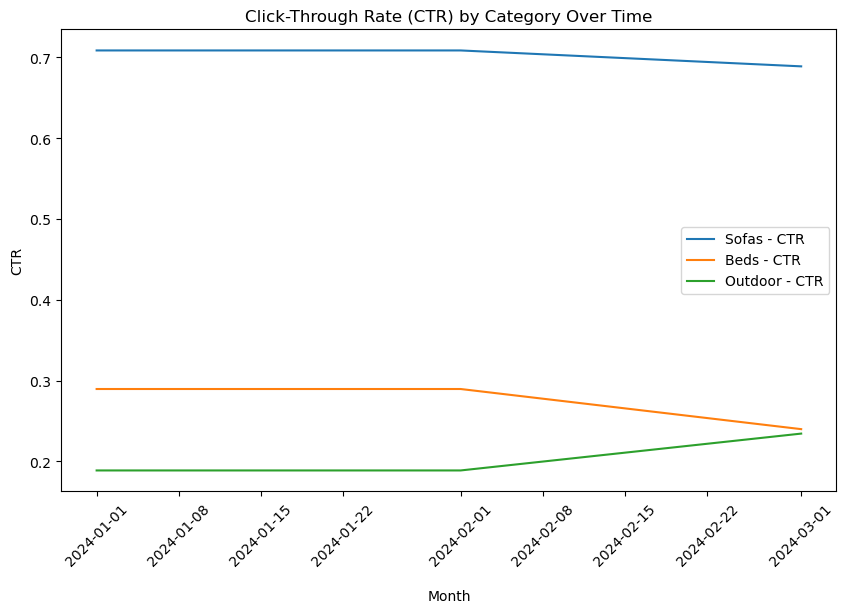

In [13]:
# Calculate CTR for each category and month
df['CTR'] = df['Clicks'] / df['Impressions']

# Plot CTR by type of furniture
plt.figure(figsize=(10,6))
for category in df['Category'].unique():
    category_data = df[df['Category'] == category]
    plt.plot(category_data['Month'], category_data['CTR'], label=f'{category} - CTR')

plt.title('Click-Through Rate (CTR) by Category Over Time')
plt.xlabel('Month', labelpad=15)
plt.ylabel('CTR')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Insights from the CTR-Month Graph

## 1. Increasing CTR of Outdoor products
#### The apparent increase in CTR for Outdoor products is largely a statistical artifact due to the sharp decline in total Impressions, rather than an actual increase in user interest.
#### a) Apart from focusing Outdoor product ads in regions where demand peaks mid-year, another strategy could be to incorporate aspirational hooks in the CTAs, which evoke lifestyle and emotional outcomes. Examples of such hooks could be: “Transform Your Backyard Into a Summer Escape!”, “Host the Perfect Garden Party!”, and “Sunshine-Ready Loungers Are Here!”. 
#### •	These hooks could effectively increase impressions for Outdoor products because people don’t buy furniture items for the product — they buy them for the experience and functionality. For Outdoor products specifically, the experience and functions include relaxing, entertaining or hosting, which must be appropriately advertised through enticing hooks and CTAs to successfully garner attention. 
#### b) Furthermore, instead of showcasing standalone product images, we could use visuals that depict the product in use, such as people lounging on outdoor sofas during a sunny afternoon, or families gathered around a patio table. 
#### •	This style of imagery helps potential customers visualize themselves using the product, tapping into emotional triggers like relaxation, togetherness, and enjoyment. It shifts the focus from the item itself to the experience it creates, which can significantly improve user engagement and click-through rates.
## 2. Declining CTR of Beds
#### a) Embedding compelling social proof, such as user reviews, ratings, testimonials, or CTAs like “X people viewed this today!” could help increase clicks for Beds.
#### •	This not only builds credibility, but also creates a sense of FOMO (Fear of Missing Out), encouraging users to click before missing a popular item.
#### b) We could also utilise Quiz Funnels or “Guided Shopping”, whereby instead of static product listings, we could post short quizzes like “Find the Right Bed for Your Sleep Style”, or “Which Bed Frame Matches Your Personality?”. 
#### •	Quizzes generate interest and reduce cognitive load, thereby creating interaction and lowering bounce rates.
#### c) Product pages should be fully optimised for both mobile and desktop experiences, paying attention to tap targets, load time and scroll behaviour.  

# Following are other charts to help us visualise the dataframe:

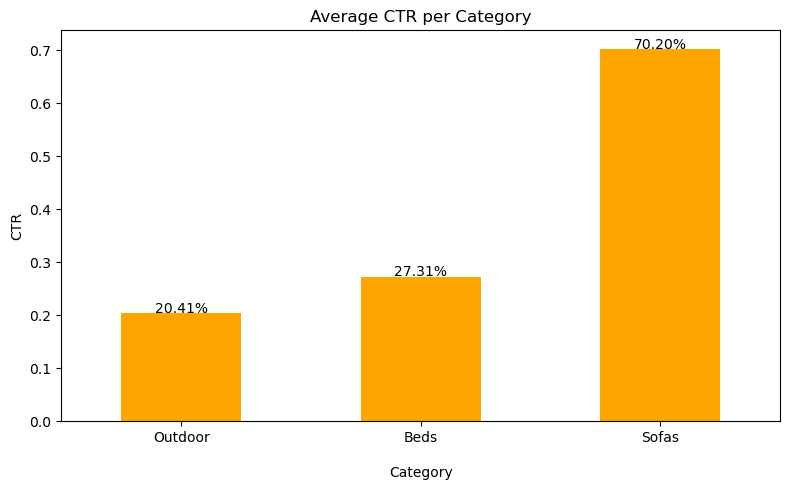

In [15]:
# Calculate CTR for each category and month
df['CTR'] = df['Clicks'] / df['Impressions']
ctr_by_category = df.groupby('Category')['CTR'].mean().sort_values()

# Plot
ax = ctr_by_category.plot(kind='bar', color='orange', figsize=(8, 5))
plt.title('Average CTR per Category')
plt.ylabel('CTR')
plt.xlabel('Category', labelpad=15)

# Rotate x-axis labels to horizontal
plt.xticks(rotation=0)

# Annotations
for i, v in enumerate(ctr_by_category):
    plt.text(i, v + 0.0005, f"{v:.2%}", ha='center')

plt.tight_layout()
plt.show()

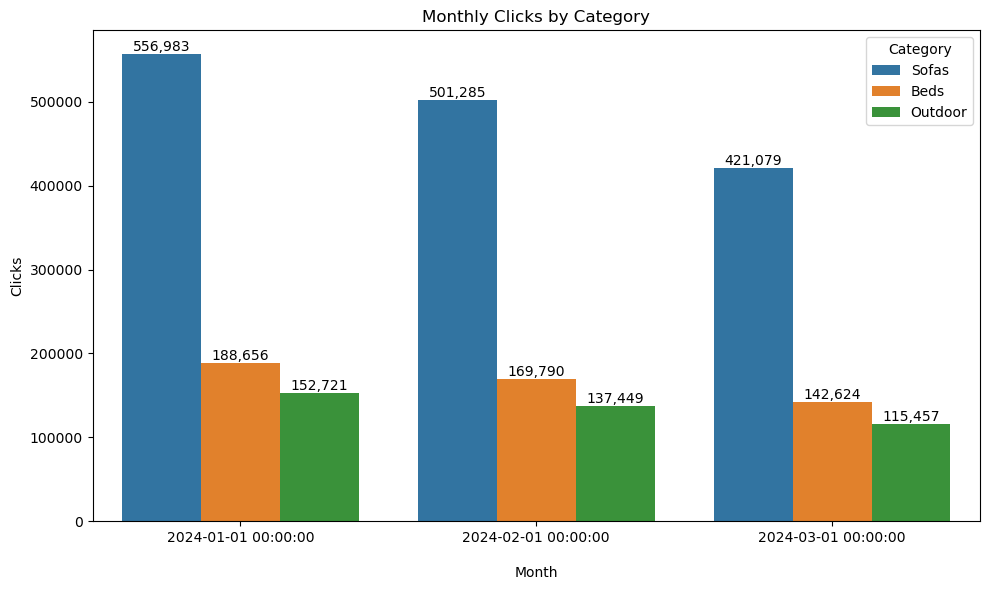

In [17]:
import seaborn as sns

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Month', y='Clicks', hue='Category')

plt.title('Monthly Clicks by Category')
plt.ylabel('Clicks')
plt.xlabel('Month', labelpad=15)

# Add annotations
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
        plt.gca().annotate(f'{int(height):,}', 
                           (p.get_x() + p.get_width() / 2, height),
                           ha='center', va='bottom')

plt.tight_layout()
plt.show()

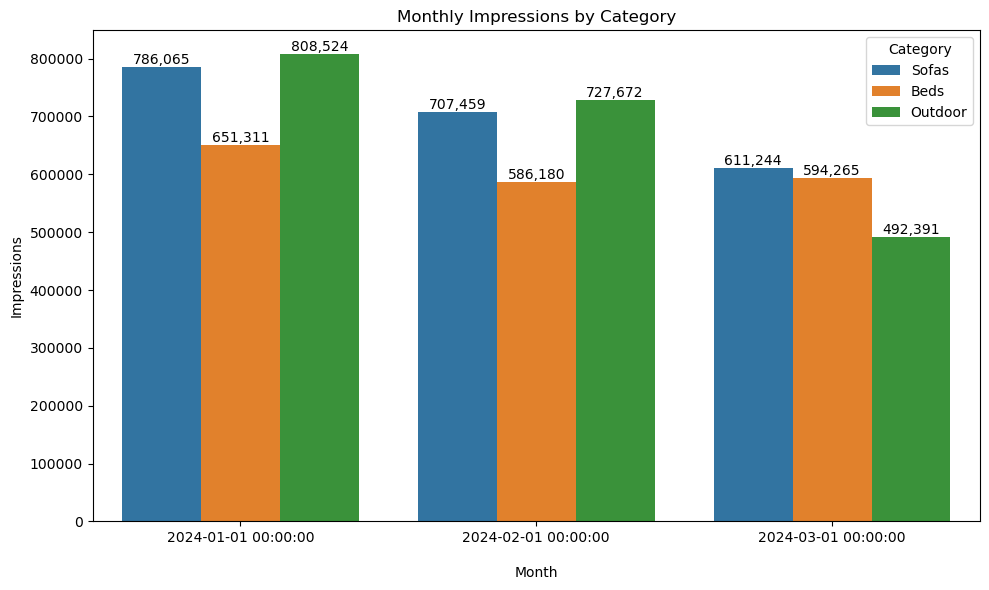

In [19]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Month', y='Impressions', hue='Category')

plt.title('Monthly Impressions by Category')
plt.ylabel('Impressions')
plt.xlabel('Month', labelpad=15)

# Annotations
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
        plt.gca().annotate(f'{int(height):,}', 
                           (p.get_x() + p.get_width() / 2, height),
                           ha='center', va='bottom')

plt.tight_layout()
plt.show()

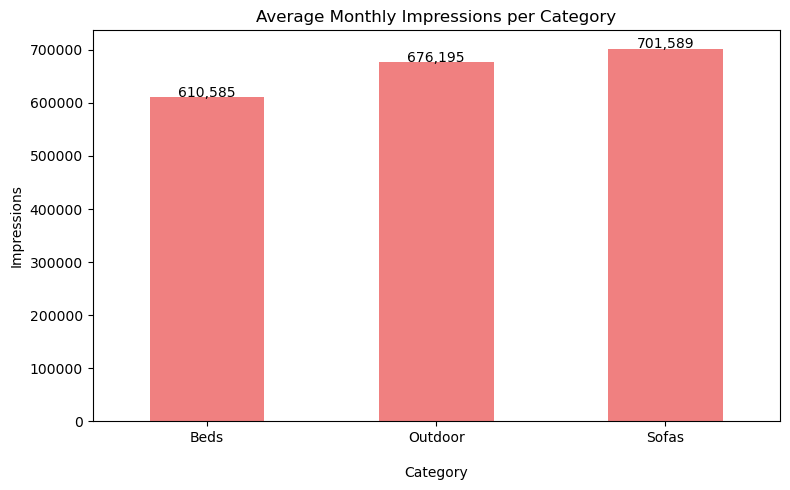

In [21]:
avg_impressions = df.groupby('Category')['Impressions'].mean().sort_values()

# Plot
ax = avg_impressions.plot(kind='bar', color='lightcoral', figsize=(8, 5))
plt.title('Average Monthly Impressions per Category')
plt.ylabel('Impressions')
plt.xlabel('Category', labelpad=15)

# Rotate x-axis labels to horizontal
plt.xticks(rotation=0)

# Annotations
for i, v in enumerate(avg_impressions):
    plt.text(i, v + 1000, f"{int(v):,}", ha='center')

plt.tight_layout()
plt.show()